In [1]:
import sys 

import sklearn
import numpy as np 
import os
import pandas as pd
import time

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
from sklearn.datasets import fetch_openml
import matplotlib as mpl
import matplotlib.pyplot as plt

from IPython.utils import io

import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_predict,GridSearchCV
from sklearn.preprocessing import StandardScaler,MaxAbsScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error ,r2_score,mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

## About the data
From the web scarping process, I took this featuers:
1. year - year of car production
1. make - the maker of the car
1. model - the model of the car
1. mileage - the mileage (as shown on the odometer)
1. state of origin - where the actuoin was placed
1. engine size - the engine size in L/cc
1. engine type - the engine structure (V8/I4/Flat-12 ...)
1. drivetrain - type of drive train (RWD/FWD/AWD)
1. transmmision type - manuel or automatic transmmision
1. number of gears -nuber of gears in the transmision(cvt = -1)
1. body_style - the body style of the car(saden/ coupe /SUV...)
1. color - the color of the car
1. numberg of higlights - the nuber of highloghts that the owner wrote in the post
1. number of flaws - the nuber of highloghts that the owner wrote in the post
1. num of bids - the number of bids people gave
1. num of comments - the number of comments on the auction post
1. num of images - how many images the owner gave
1. sold - if the acution was succsesfull or not(reserve met)
1. price - the price of the last bit(whether it was sold or not)

## Cleaning the data

In [2]:
df : pd.DataFrame = pd.read_csv('my_data.csv')

In [3]:
df.head()

,Unnamed: 0,year,make,model,mileage,state of origin,engine size,engine type,drivetrain,transmmision type,number of gears,body_style,color,numberg of higlights,number of flaws,num of bids,num of comments,num of images,sold,price
0,0,2008,Porsche,911,"18,400",WA,3.6L,Flat-6,Rear-wheel drive,Manual,6-Speed,Coupe,Black,6,8,34,100,101,0,"$160,000"
1,1,1992,Buick,Roadmaster,"15,100",TX,5.7L,V8,Rear-wheel drive,Automatic,4-Speed,Sedan,Dark Maple Red,5,0,23,83,90,1,"$9,300"
2,2,2001,BMW,M3,"67,800 Miles Shown",NY,3.2L,I6,Rear-wheel drive,Manual,6-Speed,Coupe,Titanium Silver Metallic,5,10,32,115,82,1,"$29,000"
3,3,2005,Mercedes-Benz,E55 AMG,"112,800",KY,5.4L,V8,Rear-wheel drive,Automatic,5-Speed,Sedan,Black Opal Metallic,5,7,8,36,121,0,"$11,100"
4,4,2002,BMW,X5,"125,800",GA,4.6L,V8,4WD/AWD,Automatic,5-Speed,SUV/Crossover,Black Sapphire Metallic,5,15,29,26,146,1,"$9,600"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5765 entries, 0 to 5764
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            5765 non-null   int64 
 1   year                  5765 non-null   object
 2   make                  5765 non-null   object
 3   model                 5765 non-null   object
 4   mileage               5765 non-null   object
 5   state of origin       5765 non-null   object
 6   engine size           5765 non-null   object
 7   engine type           5765 non-null   object
 8   drivetrain            5765 non-null   object
 9   transmmision type     5765 non-null   object
 10  number of gears       5728 non-null   object
 11  body_style            5765 non-null   object
 12  color                 5765 non-null   object
 13  numberg of higlights  5765 non-null   int64 
 14  number of flaws       5765 non-null   int64 
 15  num of bids           5765 non-null   

Let's check for any null data

In [5]:
df.isnull().sum()

Unnamed: 0               0
year                     0
make                     0
model                    0
mileage                  0
state of origin          0
engine size              0
engine type              0
drivetrain               0
transmmision type        0
number of gears         37
body_style               0
color                    0
numberg of higlights     0
number of flaws          0
num of bids              0
num of comments          0
num of images            0
sold                     0
price                    0
dtype: int64

In [6]:
df[df.isnull().any(axis=1)]

,Unnamed: 0,year,make,model,mileage,state of origin,engine size,engine type,drivetrain,transmmision type,number of gears,body_style,color,numberg of higlights,number of flaws,num of bids,num of comments,num of images,sold,price
1050,1050,2016,Tesla,Model S,"84,300",IL,Dual,90D,4WD/AWD,Automatic,NaN,Sedan,Midnight Silver Metallic,7,4,33,41,74,1,"$50,000"
2010,2010,2018,Tesla,Model 3,"76,900",CA,Single,Motor,Rear-wheel drive,Automatic,NaN,Sedan,Black,4,2,22,32,125,1,"$44,069"
2029,2029,2016,Tesla,Model X,"27,700",CA,Dual,Motors,4WD/AWD,Automatic,NaN,SUV/Crossover,Obsidian Black Metallic,7,1,19,51,72,1,"$64,500"
2057,2057,2020,Tesla,Model Y,"13,500",FL,Dual,Motors,4WD/AWD,Automatic,NaN,SUV/Crossover,Black,4,2,12,21,65,1,"$56,000"
2130,2130,2016,Tesla,Model X,"9,900",CA,Dual,Motors,4WD/AWD,Automatic,NaN,SUV/Crossover,Titanium Metallic,4,0,13,35,61,1,"$68,656"
2228,2228,2016,Tesla,Model X,"48,900",CA,Dual,Motors,4WD/AWD,Automatic,NaN,SUV/Crossover,Deep Blue Metallic,5,2,27,42,51,0,"$61,500"
2274,2274,2013,Tesla,Model S,"3,780",PA,Single,Motor,Rear-wheel drive,Automatic,NaN,Sedan,White,5,0,21,145,69,0,"$29,250"
2312,2312,2020,Tesla,Model Y,"7,500",CA,Dual,Motors,4WD/AWD,Automatic,NaN,SUV/Crossover,White,5,3,14,67,76,0,"$51,000"
2323,2323,2019,Tesla,Model X,"23,100",TX,Dual,Motors,4WD/AWD,Automatic,NaN,SUV/Crossover,Red,5,2,19,56,85,0,"$70,500"
2473,2473,2021,Tesla,Model S,800,PA,Triple,Motors,4WD/AWD,Automatic,NaN,Sedan,Solid Black,5,0,15,168,134,0,"$132,000"


We can see that this are the electirc cars, that have no gears. So let's give them 1 gear

In [7]:
df.loc[df.isnull().any(axis=1),'number of gears'] = 1

We are only intrested in the sold cars. Becuase of we have a car that didn't sell that means that bid was no in the range of the price pf the car

In [8]:
df = df.drop(df.loc[df['sold'] == 0].index)
df = df.drop('sold',axis=1)

in one page there was no year of prduction, insted it was "Consumer" somthing.. so I just deleted this row,  + the Unamed:0 colum the was the resualt of combing of all the dataframes from the scrapper.

In [9]:
df = df.drop("Unnamed: 0",axis=1)
df = df.drop(df.loc[df['year'] == '"Consumer'].index)

### fixing the numerical columns

Some columns are in numbers, but becuase there was a charecter in them ('$',',','L') so I needed to prase the change them to numerical data(int/float)

In the price column all we need to do is to remove the '$' symbol infront and remove the ','

In [10]:
df["price"] = df["price"].apply(lambda x: x[1:])
df["price"] = df["price"].apply(lambda x: x.replace(",",""))

In the mileage column, we remove the ',' smbol as well as the '~' symbol that were on one car.
moreover their were some comments on the mileage column, that said xxxx miles on the odometer, I also got rid of them.

In [11]:
def get_miles_from_str(x):
    if isinstance(x,int):
        return x
    x = x.replace(",","")
    x = x.split(" ")[0]
    x = x.replace("~","")
    if x[0].isdigit():
        return x
    return 0

df["mileage"] = df["mileage"].apply(lambda x: get_miles_from_str(x))

In the engine colum their were more problems. Some were electric, some in Liters, some in cc and some were completlly missing.
I fixed the missing manually by checking simmilar cars. 
all of the Electric cars were given 0 engine size, and all the other car's engine size were represented in cc

In [12]:
df["engine size"] = df["engine size"].replace(['Single','Dual','Triple','AC','EV'],0)
def convert(x : str):
    if isinstance(x,int):
        return x
    elif "cc" in x:
        x = x.replace("cc","")
        return int(x)
    elif "Liter" in x:
        x = x.replace("-Liter","")
        x = x.replace(".","")
        for i in range(0,4 -len(x)):
            x = x + "0"
        return int(x)
    elif "L" in x:
        x = x.replace("L","")
        x = x.replace(".","")
        for i in range(0,4 -len(x)):
            x = x + "0"
        return int(x)
    elif "." in x:
        x = x.replace(".","")
        x = x.replace("-liter","")
        for i in range(0,4 -len(x)):
            x = x + "0"
        return int(x)
    else:
        return x
    

df["engine size"] = df["engine size"].apply(convert)

there were cars that wrote the enine entry not like everyone else,becuse it just 5 cars, lets drop them.

In [13]:
to_fix_df = []
def convert(x : int):
    try:
        y = int(x)
        if isinstance(y,int):
            return x
    except ValueError:    
        to_fix_df.append(df.loc[df['engine size'] == x])

df["engine size"].apply(convert);
tf = pd.DataFrame()
for f in to_fix_df:
    tf = pd.concat([tf,f])

df = df.drop(tf.index)

In [14]:
df['engine type'].unique()

array(['V8', 'I6', 'V6', 'I4', 'Flat-4', 'Flat-6', 'V10', 'I5', 'V12',
       'Rotary', 'turbodiesel', 'I3', '6', 'V2', 'H6', '12-Cylinder', '4',
       'W12', '90D', 'Inline-4', 'W8', 'VR6', '3.0L', 'Diesel', 'Motor',
       'Motors', 'H4', 'I-4', 'Turbodiesel', 'Turbo', '75', 'I-6', 'P90D',
       'I-3', '100D', 'Flat-2', '75D', 'generator', '85', 'P85', 'EV',
       'i4', 'motor', 'Hybrid', 'V-8', 'Flat-Six'], dtype=object)

again, not all post were equal. So I had to fix it manually.

I also combined all the same engines, that had different names like "I4", "Inline-4","i-4" etc...

In [15]:
df.loc[df["engine type"] == "Canada","engine type"] = "Flat-6"
df.loc[df["engine type"] == "Supercharged","engine type"] = "V6"
df.loc[df["engine type"] == "Diesel","engine type"] = "I4"
df.loc[df["engine type"] == "3.0L","engine type"] = "I6"
df.loc[df["engine type"] == "turbodiesel","engine type"] = "I6"
df.loc[df["engine type"] == "I-6","engine type"] = "I6"
df.loc[df["engine type"] == "Turbodiesel","engine type"] = "V6"
df.loc[df["engine type"] == "VR6","engine type"] = "V6"
df.loc[df["engine type"] == "Turbo","engine type"] = "I4"
df.loc[df["engine type"] == "4","engine type"] = "Flat-4"
df.loc[df["engine type"] == "6","engine type"] = "Flat-6"
df.loc[df["engine type"] == "Inline-4","engine type"] = "I4"
df.loc[df["engine type"] == "i4","engine type"] = "I4"
df.loc[df["engine type"] == "I-4","engine type"] = "I4"
df.loc[df["engine type"] == "I-3","engine type"] = "I3"
df.loc[df["engine type"] == "Hybrid","engine type"] = "V6"
df.loc[df["engine type"] == "H6","engine type"] = "Flat-6"
df.loc[df["engine type"] == "Flat-Six","engine type"] = "Flat-6"
df.loc[df["engine type"] == "H4","engine type"] = "Flat-4"
df.loc[df["engine size"] == 0,"engine type"] = "electric"


I changed the number of gears, so that I have this column in integers. and again' needed to fix some values manually

In [16]:
df.loc[df["number of gears"] == "3.6L V6","number of gears"] = "6-speed"
def simplefy_gears(x:str):
    if not isinstance(x,str):
        return 0
    if x == "CVT":
        return -1
    x = x.split("-")[0]
    return x

df["number of gears"] = df["number of gears"].apply(simplefy_gears)

There were to many collor. So I grouped all of them together

In [17]:
def simplefy_color(x : str):
    if "white" in x.lower():
        x = "white"
    elif "black" in x.lower():
        x = "black"
    elif "red" in x.lower():
        x = "red"
    elif "blue" in x.lower():
        x = "blue"
    elif "yellow" in x.lower():
        x = "yellow"
    elif "grey" in x.lower():
        x = "grey"
    elif "green" in x.lower():
        x = "green"
    elif "silver" in x.lower():
        x = "silver"
    elif "orange" in x.lower():
        x = "orange"
    elif "metallic" in x.lower():
        x = "metallic"
    elif "pearl" in x.lower():
        x = "pearl"
    elif "gold" in x.lower():
        x = "gold"
    elif "beige" in x.lower():
        x = "beige"
    else:
        x = "special"

    return x

df["color"] = df["color"].apply(simplefy_color)

Now let's make everything numerical

In [18]:
df["price"] = df['price'].astype(str).astype(int)
df["mileage"] = df['mileage'].astype(str).astype(int)
df["year"] = df['year'].astype(str).astype(int)
df["engine size"] = df['engine size'].astype(str).astype(int)
df["number of gears"] = df['number of gears'].astype(str).astype(int)

I combined this cloumn to describe how detailed was the post. It made sense that a more detailed post, were bidded higher(even thought it was a wrong assamption)

In [19]:
# df["is descreptive"] = df["numberg of higlights"] + df["number of flaws"] > 15
# df["is descreptive"] = df["is descreptive"].map({
#     True: 1,
#     False: 0
# })

#df = df.drop(["numberg of higlights","number of flaws"],axis=1)

In [20]:
df.describe(include='all')

,year,make,model,mileage,state of origin,engine size,engine type,drivetrain,transmmision type,number of gears,body_style,color,numberg of higlights,number of flaws,num of bids,num of comments,num of images,price
count,4959.000000,4959,4959,4959.000000,4959,4959.000000,4959,4959,4959,4959.000000,4959,4959,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000
unique,NaN,86,747,NaN,63,NaN,18,3,2,NaN,8,14,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,BMW,911,NaN,CA,NaN,V8,Rear-wheel drive,Automatic,NaN,Sedan,black,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,950,133,NaN,983,NaN,1803,2662,2827,NaN,1283,1024,NaN,NaN,NaN,NaN,NaN,NaN
mean,2003.689454,NaN,NaN,82828.562210,NaN,3653.165154,NaN,NaN,NaN,5.487598,NaN,NaN,5.324662,5.666263,28.708409,68.373059,116.102642,22193.185521
std,9.239537,NaN,NaN,54940.257435,NaN,1450.959322,NaN,NaN,NaN,1.276513,NaN,NaN,0.888873,3.945184,13.227280,51.589174,45.765879,23224.165271
min,1981.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,-1.000000,NaN,NaN,3.000000,0.000000,1.000000,2.000000,37.000000,1800.000000
25%,1997.000000,NaN,NaN,41600.000000,NaN,2500.000000,NaN,NaN,NaN,5.000000,NaN,NaN,5.000000,3.000000,19.000000,36.000000,83.000000,9000.000000
50%,2004.000000,NaN,NaN,74500.000000,NaN,3400.000000,NaN,NaN,NaN,5.000000,NaN,NaN,5.000000,5.000000,27.000000,55.000000,106.000000,15152.000000
75%,2011.000000,NaN,NaN,113600.000000,NaN,4700.000000,NaN,NaN,NaN,6.000000,NaN,NaN,6.000000,8.000000,37.000000,85.000000,139.000000,25870.000000


### some insights
 
- most of the cars are realletivly old (2010 and under) while the mean year is 2003
- the most sold brand is the BMW
- the most sold model is the 911(Porchse) which is not quite unsuall as porsche does not have as many model as BMW
- the avarage car in the US does ~82K miles.
- the US being US loves big engine and it shows in the avarage engine size(3.6L) althought it is not quite right becuase we gave electric engines size of 0. but They dont acutally have a size
- the most sold combo is a V8 engine, RWD with automatic transmision.
- the most sold color is black
- and finnaly the avarage car price is ~22K where most of them go under 25K

## Analyzing the data

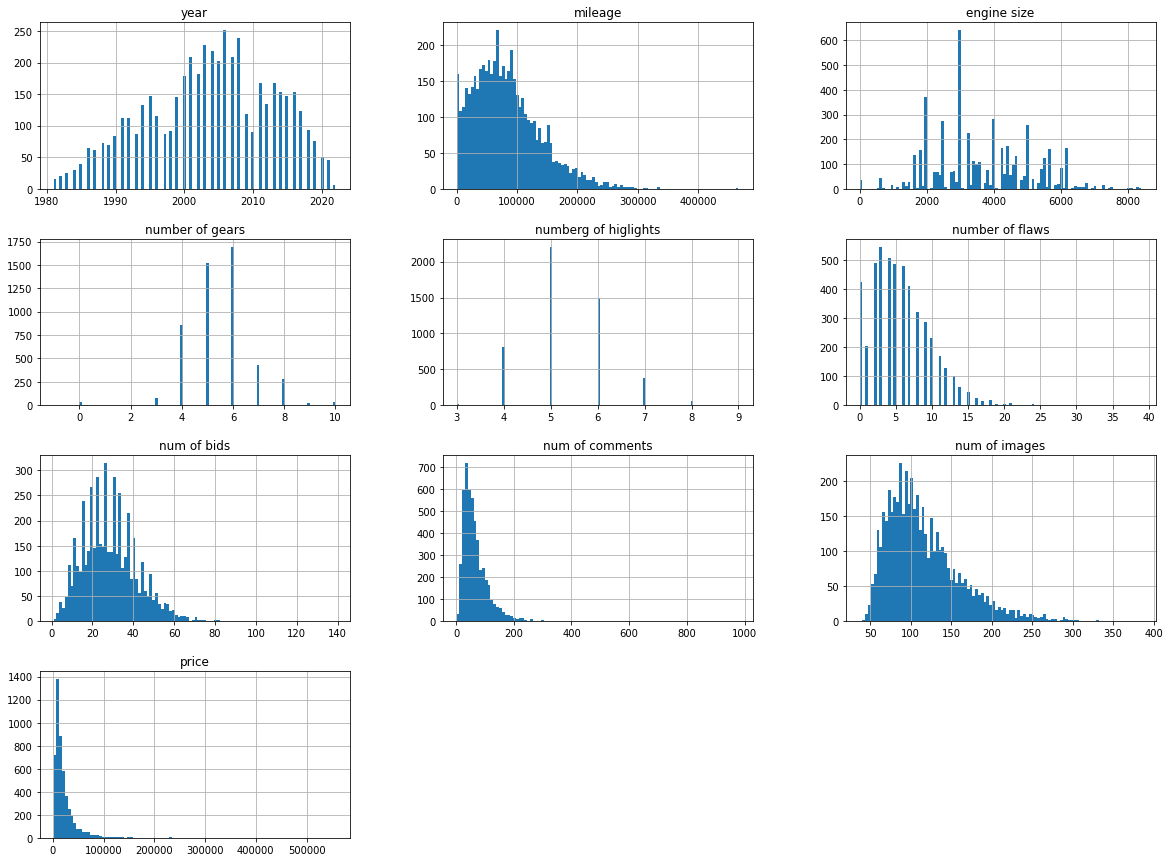

In [21]:
fig_size=(20,15)
df.hist(bins=100, figsize=(20,15));

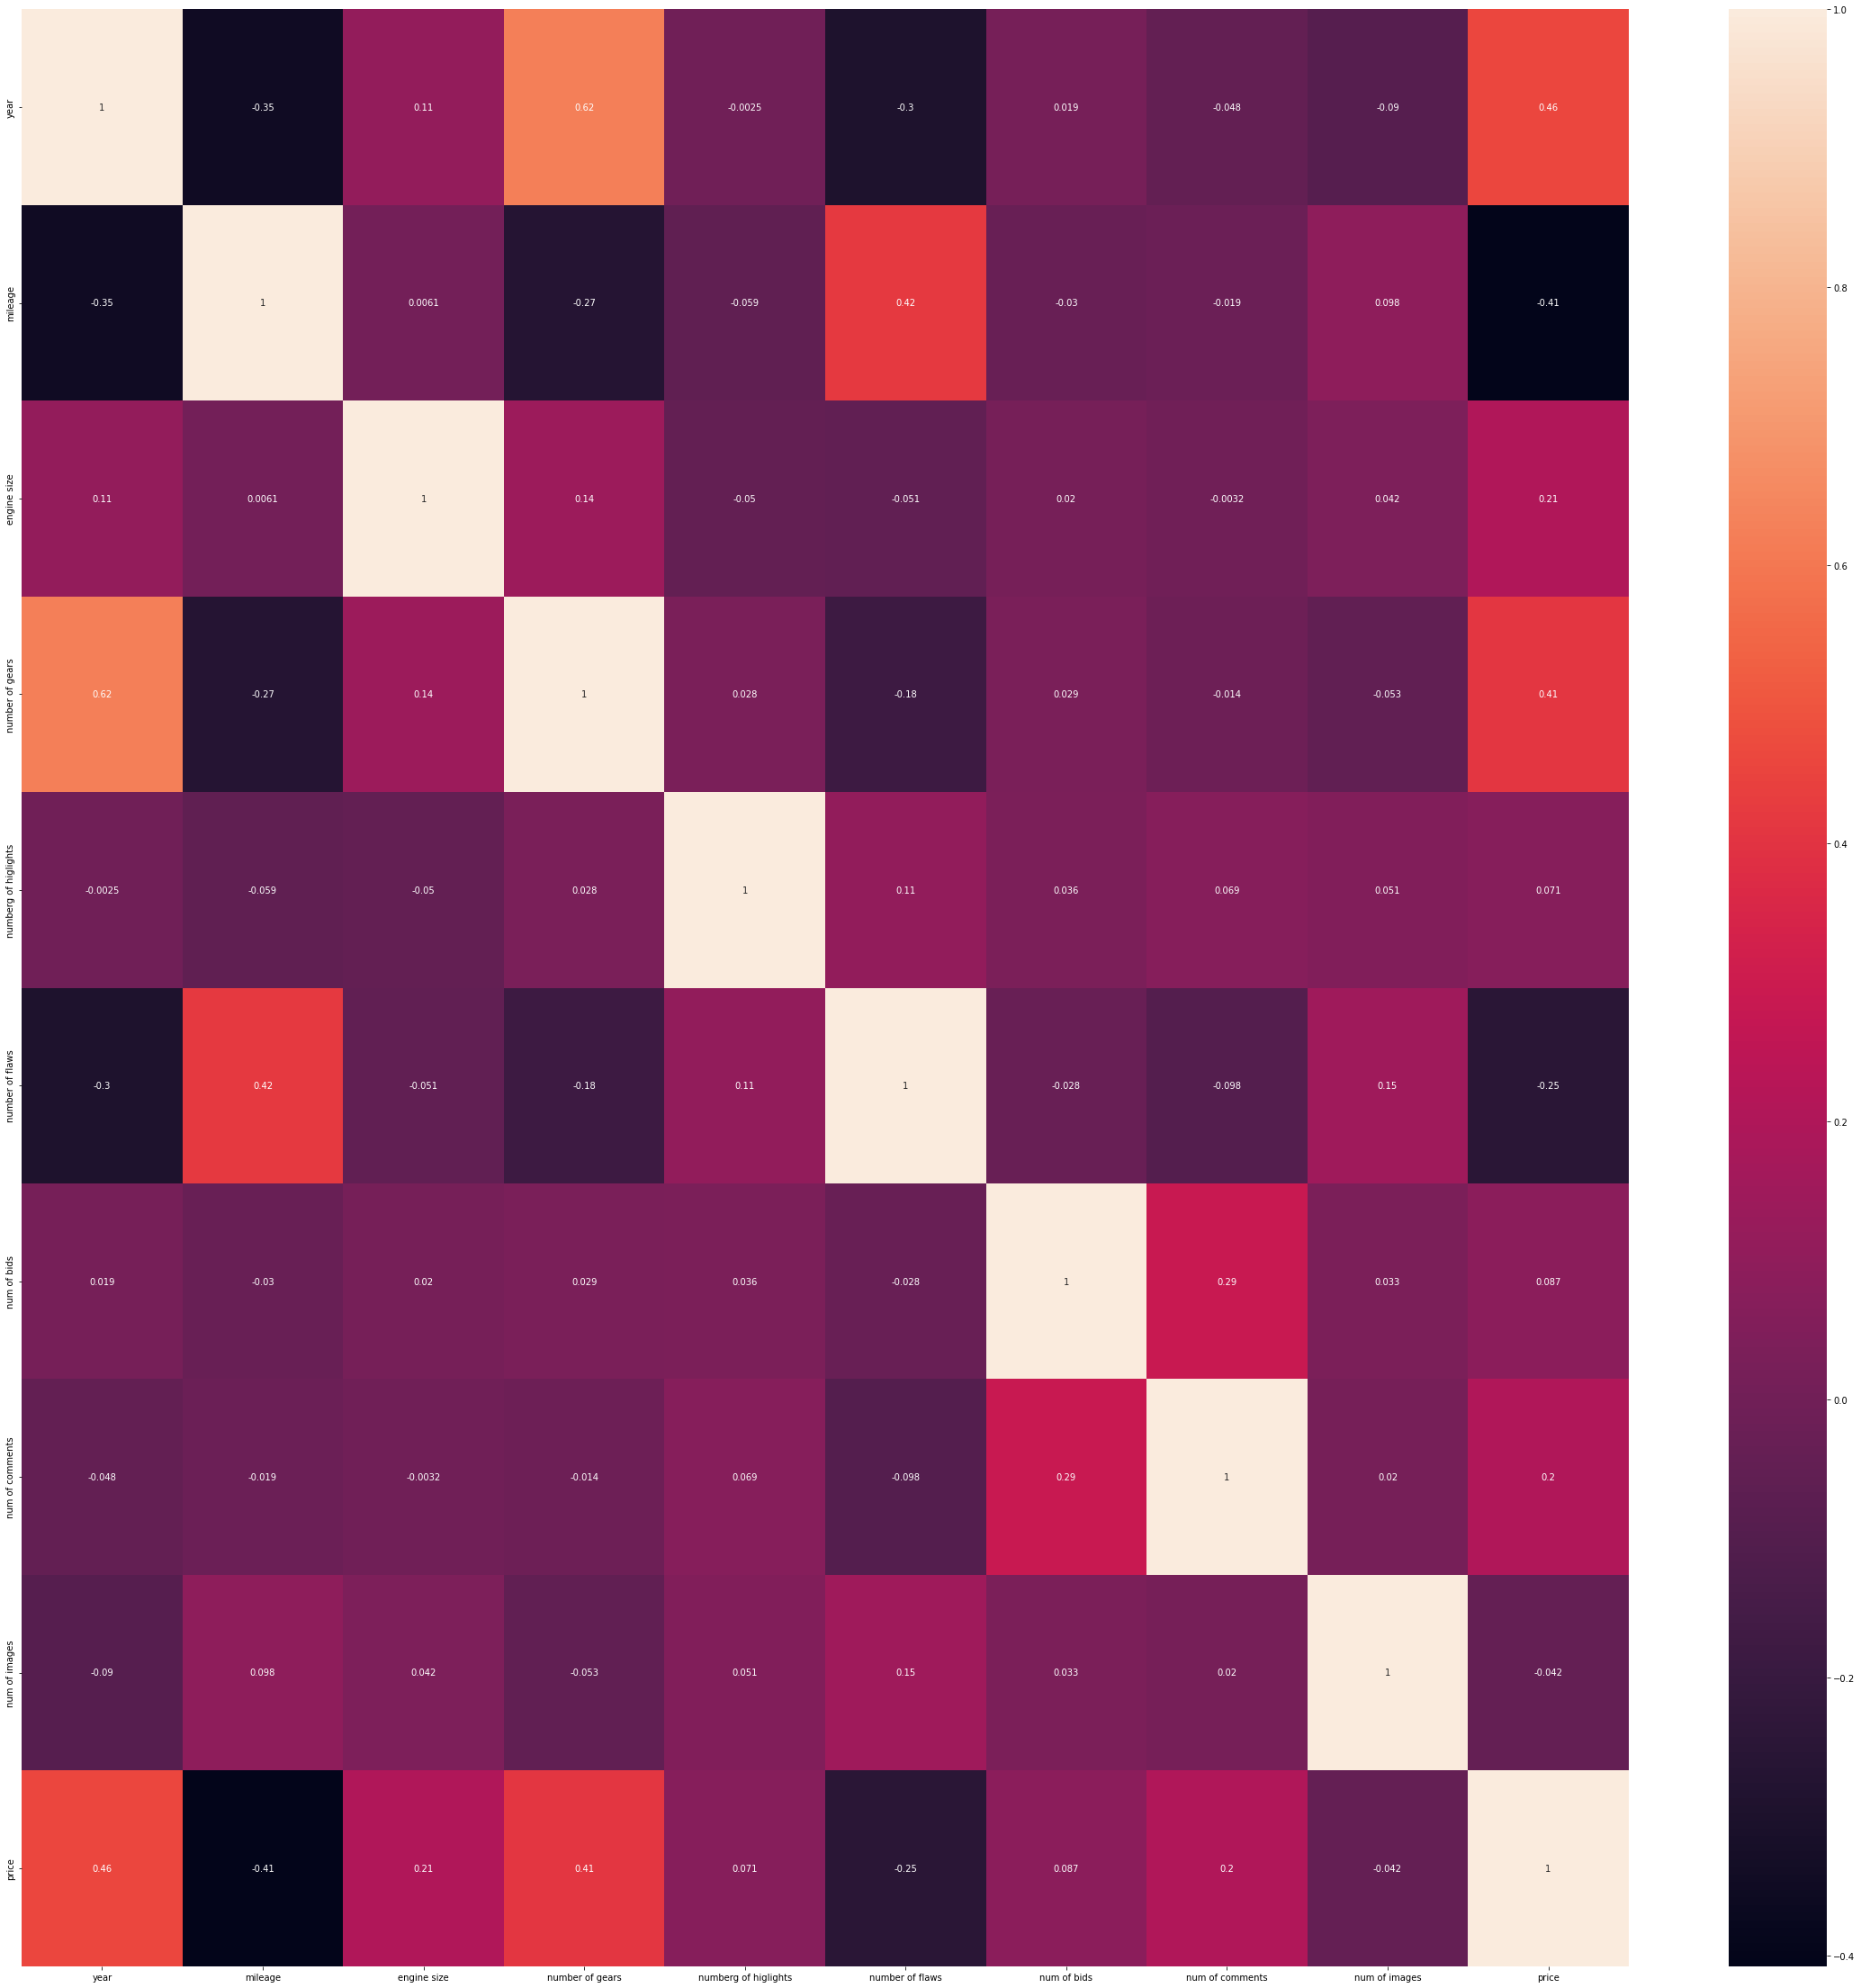

In [22]:
corr_mat= df.corr()
f, ax = plt.subplots(figsize=(40,40))
sns.heatmap(corr_mat,annot=True);

In [23]:
df.groupby(['make','model'])['price'].mean()
means = df.groupby(['make','model']).transform('mean')
df['price diff'] = df['price'] - means['price']

<AxesSubplot:>

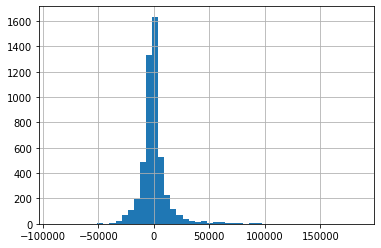

In [24]:
df['price diff'].hist(bins=50)

In [25]:
df = df.drop('price diff',axis=1)

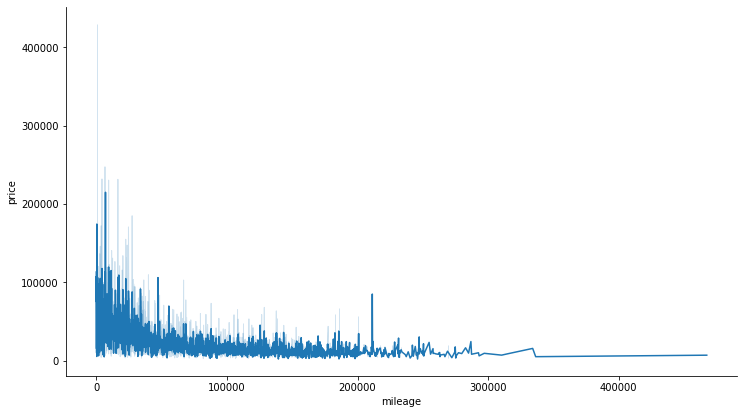

In [26]:
mileage_price_rel = sns.relplot(x="mileage", y="price" ,data=df,kind='line')
mileage_price_rel.fig.set_figwidth(12)
mileage_price_rel.fig.set_figheight(6)

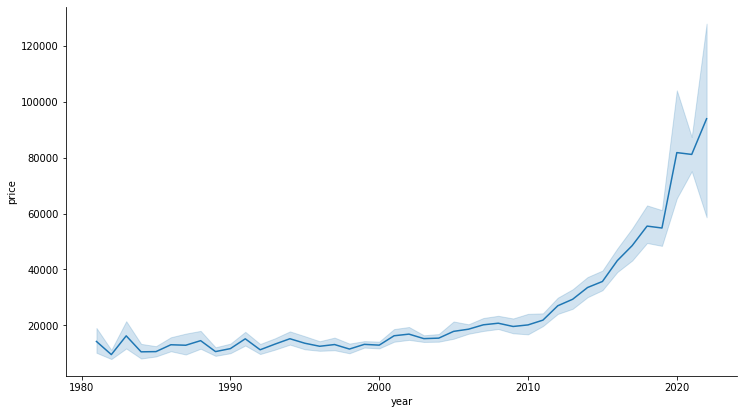

In [27]:
year_price_rel = sns.relplot(x="year", y="price" ,data=df,kind='line')
year_price_rel.fig.set_figwidth(12)
year_price_rel.fig.set_figheight(6)

We can see that the data is scatterd around, and althoguht their is slight increse in engine size comparred to the price, it still looks quite random.

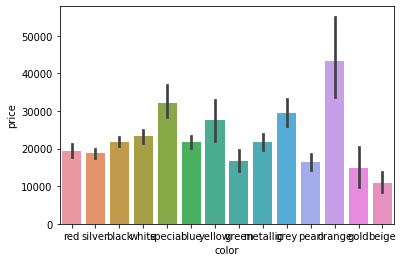

In [28]:
color_price_rel = sns.barplot(x="color", y="price" ,data=df)

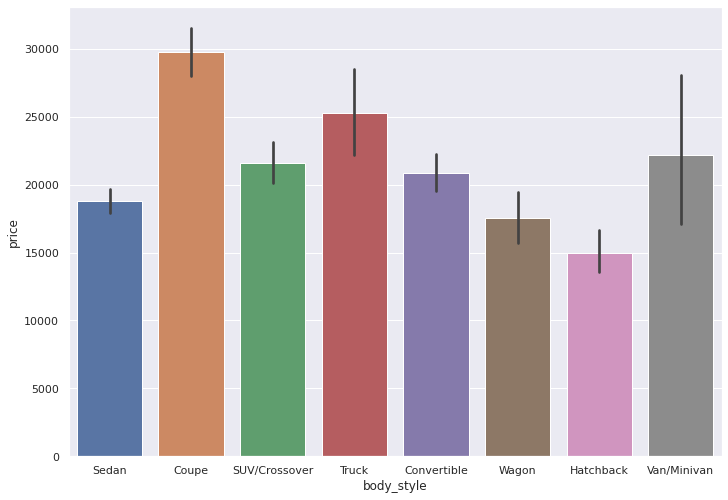

In [29]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
body_price_rel = sns.barplot(x="body_style", y="price" ,data=df)

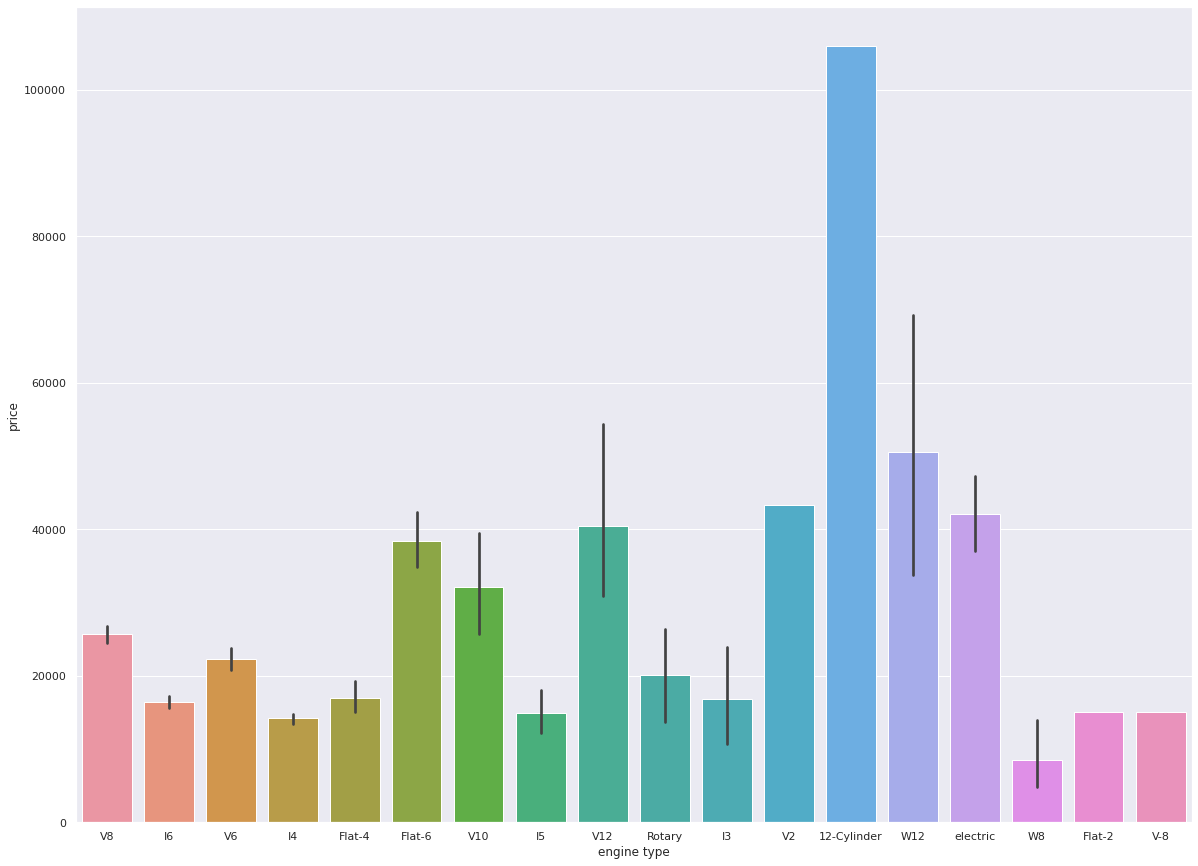

In [30]:
sns.set(rc={'figure.figsize':(20,15)})
body_price_rel = sns.barplot(x="engine type", y="price" ,data=df)

In [31]:
df[df['engine type'] == '12-Cylinder']

,year,make,model,mileage,state of origin,engine size,engine type,drivetrain,transmmision type,number of gears,body_style,color,numberg of higlights,number of flaws,num of bids,num of comments,num of images,price
525,1987,Ferrari,Testarossa,47200,NJ,4900,12-Cylinder,Rear-wheel drive,Manual,5,Coupe,special,6,6,31,109,134,106000


In [62]:
df['age'] = 2022.1 - df['year']
df['miles per year'] = df['mileage']/df['age']

In [63]:
df.loc[df['miles per year'] > 100000]

,index,year,make,model,mileage,state of origin,engine size,engine type,drivetrain,transmmision type,...,body_style,color,numberg of higlights,number of flaws,num of bids,num of comments,num of images,price,age,miles per year


In [64]:
df.describe()

,index,year,mileage,engine size,number of gears,numberg of higlights,number of flaws,num of bids,num of comments,num of images,price,age,miles per year
count,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000
mean,2867.100222,2003.689454,82828.562210,3653.165154,5.487598,5.324662,5.666263,28.708409,68.373059,116.102642,22193.185521,18.410546,5083.707125
std,1647.190960,9.239537,54940.257435,1450.959322,1.276513,0.888873,3.945184,13.227280,51.589174,45.765879,23224.165271,9.239537,3362.252027
min,1.000000,1981.000000,0.000000,0.000000,-1.000000,3.000000,0.000000,1.000000,2.000000,37.000000,1800.000000,0.100000,0.000000
25%,1441.500000,1997.000000,41600.000000,2500.000000,5.000000,5.000000,3.000000,19.000000,36.000000,83.000000,9000.000000,11.100000,2532.762079
50%,2880.000000,2004.000000,74500.000000,3400.000000,5.000000,5.000000,5.000000,27.000000,55.000000,106.000000,15152.000000,18.100000,4510.822511
75%,4274.500000,2011.000000,113600.000000,4700.000000,6.000000,6.000000,8.000000,37.000000,85.000000,139.000000,25870.000000,25.100000,7056.759837
max,5764.000000,2022.000000,467400.000000,8400.000000,10.000000,9.000000,39.000000,139.000000,979.000000,385.000000,557000.000000,41.100000,37000.000000


In [65]:
df = df.reset_index()

In [66]:
df.isna().sum()

level_0                 0
index                   0
year                    0
make                    0
model                   0
mileage                 0
state of origin         0
engine size             0
engine type             0
drivetrain              0
transmmision type       0
number of gears         0
body_style              0
color                   0
numberg of higlights    0
number of flaws         0
num of bids             0
num of comments         0
num of images           0
price                   0
age                     0
miles per year          0
dtype: int64

In [67]:
cars_df_with_dummies = pd.get_dummies(df)

In [68]:
cars_df_with_dummies

,level_0,index,year,mileage,engine size,number of gears,numberg of higlights,number of flaws,num of bids,num of comments,...,color_green,color_grey,color_metallic,color_orange,color_pearl,color_red,color_silver,color_special,color_white,color_yellow
0,0,1,1992,15100,5700,4,5,0,23,83,...,0,0,0,0,0,1,0,0,0,0
1,1,2,2001,67800,3200,6,5,10,32,115,...,0,0,0,0,0,0,1,0,0,0
2,2,4,2002,125800,4600,5,5,15,29,26,...,0,0,0,0,0,0,0,0,0,0
3,3,6,2007,108500,4400,6,4,0,21,54,...,0,0,0,0,0,0,0,0,0,0
4,4,8,1995,94700,4000,6,6,12,30,26,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4954,4954,5759,1998,119756,4600,4,5,3,24,166,...,0,0,0,0,0,0,0,0,1,0
4955,4955,5760,1997,167495,4500,4,7,3,64,222,...,0,0,0,0,0,0,0,0,0,0
4956,4956,5761,2006,86240,2500,5,6,5,25,110,...,0,0,0,0,0,0,0,0,0,0
4957,4957,5763,2007,128885,5200,6,5,9,11,118,...,0,0,1,0,0,0,0,0,0,0


In [69]:
featuers = cars_df_with_dummies.columns

for f in featuers:
    if "make" in f:
        cars_df_with_dummies[f] = cars_df_with_dummies[f].apply(lambda x: x*10)
        cars_df_with_dummies[f] = cars_df_with_dummies[f].astype(str).astype(int)

cars_df_with_dummies.describe()

,level_0,index,year,mileage,engine size,number of gears,numberg of higlights,number of flaws,num of bids,num of comments,...,color_green,color_grey,color_metallic,color_orange,color_pearl,color_red,color_silver,color_special,color_white,color_yellow
count,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,...,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000
mean,2479.000000,2867.100222,2003.689454,82828.562210,3653.165154,5.487598,5.324662,5.666263,28.708409,68.373059,...,0.042347,0.032466,0.069570,0.008469,0.021375,0.104457,0.157491,0.078645,0.134906,0.015124
std,1431.684323,1647.190960,9.239537,54940.257435,1450.959322,1.276513,0.888873,3.945184,13.227280,51.589174,...,0.201400,0.177253,0.254447,0.091648,0.144646,0.305883,0.364300,0.269211,0.341658,0.122059
min,0.000000,1.000000,1981.000000,0.000000,0.000000,-1.000000,3.000000,0.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1239.500000,1441.500000,1997.000000,41600.000000,2500.000000,5.000000,5.000000,3.000000,19.000000,36.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2479.000000,2880.000000,2004.000000,74500.000000,3400.000000,5.000000,5.000000,5.000000,27.000000,55.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3718.500000,4274.500000,2011.000000,113600.000000,4700.000000,6.000000,6.000000,8.000000,37.000000,85.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4958.000000,5764.000000,2022.000000,467400.000000,8400.000000,10.000000,9.000000,39.000000,139.000000,979.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [94]:
std_scaler = StandardScaler()

price_label = cars_df_with_dummies['price']
cars_without_price = cars_df_with_dummies.drop(['price'],axis=1)

X_train,X_test,y_train,y_test = train_test_split(cars_without_price,price_label,test_size=0.2,random_state=1)

X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

In [95]:
linear_reg = LinearRegression(normalize = False,positive = False)
linear_reg.fit(X_train, y_train)
initial_prediction = linear_reg.predict(X_test)


print(r2_score(y_test,initial_prediction))
print (mean_absolute_error(y_test,initial_prediction))

-2.203453239006201e+26
5.866346187753692e+16


In [96]:
knn_reg = KNeighborsRegressor(n_neighbors=100)

knn_reg.fit(X_train, y_train)
initial_prediction = knn_reg.predict(X_test)

print(r2_score(y_test,initial_prediction))
print (mean_absolute_error(y_test,initial_prediction))

0.2122960187726337
13385.240131048387


In [97]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
initial_prediction = rf_reg.predict(X_test)


print(r2_score(y_test,initial_prediction))
print (mean_absolute_error(y_test,initial_prediction))

0.7628755528316132
5627.298840725806


In [98]:
gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_train, y_train)
initial_prediction = gb_reg.predict(X_test)


print(r2_score(y_test,initial_prediction))
print (mean_absolute_error(y_test,initial_prediction))

0.744729153391857
6293.877832570782


In [99]:
def plot_graps():
    fig, axes = plt.subplots(1,4)
    ((ax1, ax2, ax3,ax4)) = axes

    y_predicted = cross_val_predict(linear_reg, X_train, y_train, cv=10)
    ax1.scatter(y_train, y_predicted, alpha=0.3, color='orange')
    ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
    ax1.set_xlabel('Actual')
    ax1.set_ylabel('Predicted')
    ax1.set_title('linear:')

    y_predicted = cross_val_predict(knn_reg, X_train, y_train, cv=10)
    ax2.scatter(y_train, y_predicted, alpha=0.3, color='orange')
    ax2.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
    ax2.set_xlabel('Actual')
    ax2.set_ylabel('Predicted')
    ax2.set_title('knn:')

    y_predicted = cross_val_predict(rf_reg, X_train, y_train, cv=10)
    ax3.scatter(y_train, y_predicted, alpha=0.3, color='orange')
    ax3.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
    ax3.set_xlabel('Actual')
    ax3.set_ylabel('Predicted')
    ax3.set_title('random forest:')

    y_predicted = cross_val_predict(gb_reg, X_train, y_train, cv=10)
    ax4.scatter(y_train, y_predicted, alpha=0.3, color='orange')
    ax4.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
    ax4.set_xlabel('Actual')
    ax4.set_ylabel('Predicted')
    ax4.set_title('boosting:')

    plt.show()



In [100]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)
initial_prediction = xgb_reg.predict(X_test)


print(r2_score(y_test,initial_prediction))
print (mean_absolute_error(y_test,initial_prediction))

0.8134768443742969
5195.494407069298
